In [ ]:
!pip install pandas requests

In [1]:
import csv
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

#dados_florianopolis = '/content/dados_csv/dados_A806_M_2003-01-21_2023-09-01.csv'
#dados_itajai = '/content/dados_csv/dados_A868_M_2010-06-23_2023-09-01.csv'

dados_florianopolis = 'https://raw.githubusercontent.com/anderw1ll/Dados---BDMEP/main/dados_A806_M_2003-01-21_2023-09-01.csv'
dados_itajai = 'https://raw.githubusercontent.com/anderw1ll/Dados---BDMEP/main/dados_A868_M_2010-06-23_2023-09-01.csv'

In [2]:
#Lendo arquivo dados_florianopolis com a biblioteca Pandas, pulando as 10 primeiras linhas do arquivo, visto que são apresentação da estação metereológica, definindo os valores como decimais e convertendo a primeira coluna para data.
df_florianopolis = pd.read_csv(dados_florianopolis, skiprows= range(0, 10), sep=';', decimal=',', parse_dates=['Data Medicao'])

df_florianopolis = df_florianopolis.drop(df_florianopolis.columns[4], axis=1)

florianopolis_media_pressao = df_florianopolis.groupby(df_florianopolis['Data Medicao'].dt.month)['PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'].mean()
florianopolis_media_temperatura = df_florianopolis.groupby(df_florianopolis['Data Medicao'].dt.month)['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'].mean()
florianopolis_media_preciptacao = df_florianopolis.groupby(df_florianopolis['Data Medicao'].dt.month)['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].mean()


In [3]:
df_florianopolis.info()

print("_______________________________________________________________")
print("Porcentagem de dados Vazios/Nulos")
print((df_florianopolis.isnull().sum() / len(df_florianopolis['Data Medicao']) * 100))

df_florianopolis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Data Medicao                                 249 non-null    datetime64[ns]
 1   PRECIPITACAO TOTAL, MENSAL (AUT)(mm)         216 non-null    float64       
 2   PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)  227 non-null    float64       
 3   TEMPERATURA MEDIA, MENSAL (AUT)(°C)          231 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.9 KB
_______________________________________________________________
Porcentagem de dados Vazios/Nulos
Data Medicao                                    0.000000
PRECIPITACAO TOTAL, MENSAL (AUT)(mm)           13.253012
PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)     8.835341
TEMPERATURA MEDIA, MENSAL (AUT)(°C)             7.228916
dtype: float64


,Data Medicao,"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)"
0,2003-01-31,NaN,NaN,NaN
1,2003-02-28,NaN,NaN,NaN
2,2003-03-31,NaN,NaN,NaN
3,2003-04-30,77.8,1015.673175,22.290655
4,2003-05-31,47.8,1017.016767,19.412648
...,...,...,...,...
244,2023-05-31,45.0,1018.363651,20.621277
245,2023-06-30,113.6,1018.996268,18.552899
246,2023-07-31,106.8,1020.034543,17.939651
247,2023-08-31,118.8,1017.248440,18.454961


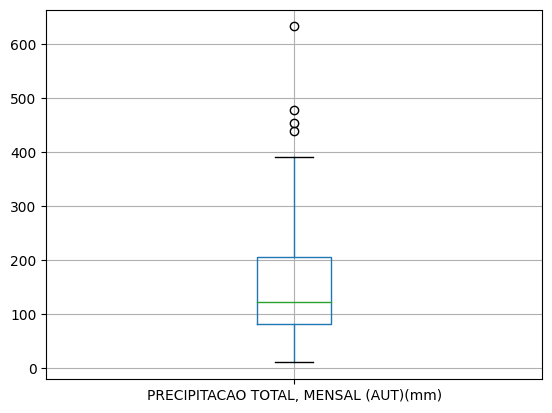

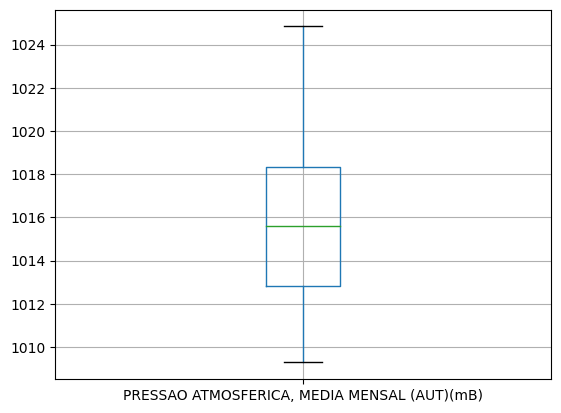

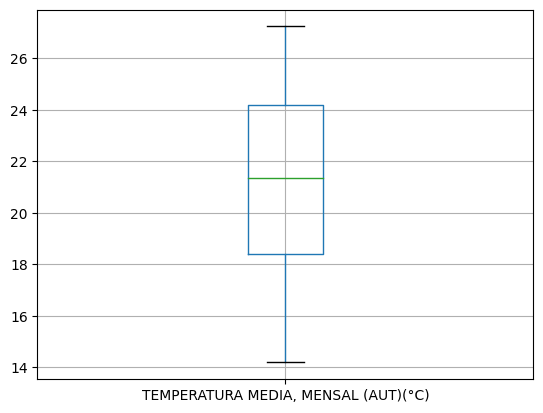

In [4]:
df_florianopolis_plot1 = df_florianopolis.boxplot(column='PRECIPITACAO TOTAL, MENSAL (AUT)(mm)')
plt.show()

df_florianopolis_plot2 = df_florianopolis.boxplot(column='PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)')
plt.show()

df_florianopolis_plot3 = df_florianopolis.boxplot(column='TEMPERATURA MEDIA, MENSAL (AUT)(°C)')
plt.show()

In [5]:
df_florianopolis.sort_values('PRECIPITACAO TOTAL, MENSAL (AUT)(mm)', ascending=False).head(10)


,Data Medicao,"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)"
70,2008-11-30,632.4,1015.362083,21.169306
239,2022-12-31,477.0,1011.939516,23.666532
61,2008-02-29,454.0,1012.294339,24.399554
88,2010-05-31,438.6,1016.502082,19.582808
216,2021-01-31,390.8,1012.380914,24.897446
180,2018-01-31,377.6,1011.950672,24.713710
103,2011-08-31,370.4,1018.112109,16.696689
218,2021-03-31,360.0,1012.568952,24.664651
60,2008-01-31,349.6,1012.957796,24.163172
108,2012-01-31,339.4,1012.293683,24.220430


In [6]:
df_florianopolis.sort_values('TEMPERATURA MEDIA, MENSAL (AUT)(°C)', ascending=False).head(10)

,Data Medicao,"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)"
192,2019-01-31,225.2,1013.154032,27.236156
133,2014-02-28,118.4,1013.144792,26.434524
169,2017-02-28,129.6,1012.464286,26.434375
85,2010-02-28,172.2,1011.894494,26.420982
144,2015-01-31,176.6,1012.998253,26.217204
132,2014-01-31,186.8,1012.722177,25.974328
109,2012-02-29,74.4,1012.069678,25.886813
168,2017-01-31,195.0,1012.205242,25.840323
157,2016-02-29,222.8,1012.604454,25.810058
36,2006-01-31,181.4,1012.259812,25.785484


In [7]:
for mes in florianopolis_media_pressao.index:
    df_florianopolis.loc[(df_florianopolis['Data Medicao'].dt.month == mes) & (df_florianopolis['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].isnull()), 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'] = florianopolis_media_preciptacao[mes]
    df_florianopolis.loc[(df_florianopolis['Data Medicao'].dt.month == mes) & (df_florianopolis['PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'].isnull()), 'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'] = florianopolis_media_pressao[mes]
    df_florianopolis.loc[(df_florianopolis['Data Medicao'].dt.month == mes) & (df_florianopolis['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'].isnull()), 'TEMPERATURA MEDIA, MENSAL (AUT)(°C)'] = florianopolis_media_temperatura[mes]

print((df_florianopolis.isnull().sum() / len(df_florianopolis['Data Medicao']) * 100))

# Arredondando os valores de Temperatura Média para 2 casas decimais.
df_florianopolis['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'] = np.round(df_florianopolis['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'], decimals = 2)

df_florianopolis

Data Medicao                                   0.0
PRECIPITACAO TOTAL, MENSAL (AUT)(mm)           0.0
PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)    0.0
TEMPERATURA MEDIA, MENSAL (AUT)(°C)            0.0
dtype: float64


,Data Medicao,"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)"
0,2003-01-31,220.210526,1012.126092,25.25
1,2003-02-28,200.511111,1012.401065,25.22
2,2003-03-31,198.526316,1013.802458,24.34
3,2003-04-30,77.800000,1015.673175,22.29
4,2003-05-31,47.800000,1017.016767,19.41
...,...,...,...,...
244,2023-05-31,45.000000,1018.363651,20.62
245,2023-06-30,113.600000,1018.996268,18.55
246,2023-07-31,106.800000,1020.034543,17.94
247,2023-08-31,118.800000,1017.248440,18.45


In [8]:
# Lendo arquivo dados_itajai com a biblioteca Pandas, pulando as 10 primeiras linhas do arquivo, visto que são apresentação da estação metereológica

df_itajai = pd.read_csv(dados_itajai, skiprows= range(0, 10), sep=';', decimal=',', parse_dates=['Data Medicao'])

df_itajai = df_itajai.drop(df_itajai.columns[4], axis=1)

itajai_media_pressao = df_itajai.groupby(df_itajai['Data Medicao'].dt.month)['PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'].mean()
itajai_media_temperatura = df_itajai.groupby(df_itajai['Data Medicao'].dt.month)['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'].mean()
itajai_media_preciptacao = df_itajai.groupby(df_itajai['Data Medicao'].dt.month)['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].mean()

In [9]:
df_itajai.info()

print("_______________________________________________________________")
print("Porcentagem de dados Vazios/Nulos")
print((df_itajai.isnull().sum() / len(df_itajai['Data Medicao']) * 100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Data Medicao                                 160 non-null    datetime64[ns]
 1   PRECIPITACAO TOTAL, MENSAL (AUT)(mm)         145 non-null    float64       
 2   PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)  148 non-null    float64       
 3   TEMPERATURA MEDIA, MENSAL (AUT)(°C)          148 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.1 KB
_______________________________________________________________
Porcentagem de dados Vazios/Nulos
Data Medicao                                   0.000
PRECIPITACAO TOTAL, MENSAL (AUT)(mm)           9.375
PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)    7.500
TEMPERATURA MEDIA, MENSAL (AUT)(°C)            7.500
dtype: float64


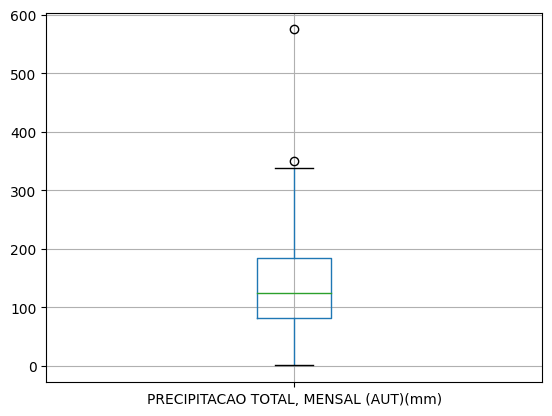

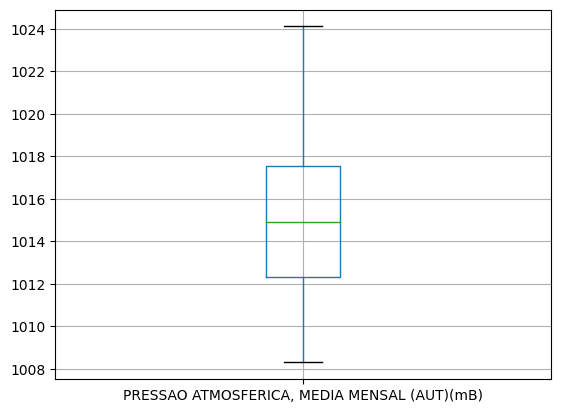

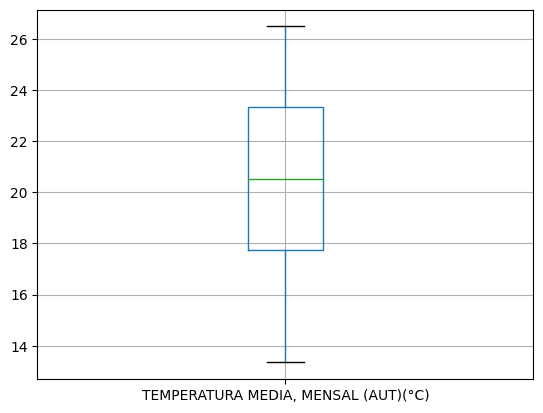

In [10]:
df_itajai_plot1 = df_itajai.boxplot(column='PRECIPITACAO TOTAL, MENSAL (AUT)(mm)')
plt.show()

df_itajai_plot2 = df_itajai.boxplot(column='PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)')
plt.show()

df_itajai_plot3 = df_itajai.boxplot(column='TEMPERATURA MEDIA, MENSAL (AUT)(°C)')
plt.show()

In [11]:
for mes in itajai_media_pressao.index:
    df_itajai.loc[(df_itajai['Data Medicao'].dt.month == mes) & (df_itajai['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].isnull()), 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'] = itajai_media_preciptacao[mes]
    df_itajai.loc[(df_itajai['Data Medicao'].dt.month == mes) & (df_itajai['PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'].isnull()), 'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'] = itajai_media_pressao[mes]
    df_itajai.loc[(df_itajai['Data Medicao'].dt.month == mes) & (df_itajai['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'].isnull()), 'TEMPERATURA MEDIA, MENSAL (AUT)(°C)'] = itajai_media_temperatura[mes]

print((df_itajai.isnull().sum() / len(df_itajai['Data Medicao']) * 100))

# Arredondando os valores de Temperatura Média para 2 casas decimais.
df_itajai['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'] = np.round(df_itajai['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'], decimals = 2)

df_itajai

Data Medicao                                   0.0
PRECIPITACAO TOTAL, MENSAL (AUT)(mm)           0.0
PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)    0.0
TEMPERATURA MEDIA, MENSAL (AUT)(°C)            0.0
dtype: float64


,Data Medicao,"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)"
0,2010-06-30,135.583333,1018.224420,16.65
1,2010-07-31,114.800000,1020.126747,16.84
2,2010-08-31,71.600000,1020.274141,15.63
3,2010-09-30,83.000000,1016.634444,18.51
4,2010-10-31,127.200000,1014.418145,19.07
...,...,...,...,...
155,2023-05-31,72.200000,1017.610215,19.06
156,2023-06-30,73.800000,1018.519702,16.85
157,2023-07-31,92.200000,1020.228804,16.51
158,2023-08-31,110.816667,1016.175481,17.82


In [12]:
#df_itajai[df_itajai['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'] == df_itajai['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].max()]
df_itajai.sort_values('PRECIPITACAO TOTAL, MENSAL (AUT)(mm)', ascending=False).head(5)

,Data Medicao,"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)"
150,2022-12-31,574.6,1010.887903,22.88
14,2011-08-31,349.6,1017.377554,16.28
33,2013-03-31,337.4,1013.593750,22.89
153,2023-03-31,329.8,1013.243683,24.13
7,2011-01-31,310.6,1008.300807,25.40


In [13]:
df_itajai.sort_values('TEMPERATURA MEDIA, MENSAL (AUT)(°C)', ascending=False).head(5)

,Data Medicao,"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)"
103,2019-01-31,236.4,1012.307527,26.48
44,2014-02-28,106.0,1012.214435,25.95
43,2014-01-31,199.4,1011.961290,25.56
80,2017-02-28,179.4,1011.593304,25.51
55,2015-01-31,150.6,1012.276478,25.48
